In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans  # For KMeans clustering algorithm
import warnings  # For handling warnings

# Suppress warnings to improve readability
warnings.filterwarnings("ignore")

In [2]:
# Import dataset
data = pd.read_csv('data/cardio_train.csv', delimiter=';')

In [3]:
# Check the first few lines of the datase
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Show descriptive statistics
print("Descriptive statistics for numerical variables:")
data.describe()

Descriptive statistics for numerical variables:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Check number of entries and columns
data.shape

(70000, 13)

In [6]:
# Calculate age in years by dividing 'age' column by 365
data['ageinyears'] = data['age'] / 365

# Drop the 'age' column since 'ageinyears' is now available
data.drop(columns=['age'], inplace=True)

In [7]:
# Drop the id column since it does not help with prediction
data = data.drop(columns=['id'])

In [8]:
# Check the null values in the dataset
null_values = data.isnull().sum()
print(null_values)

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
ageinyears     0
dtype: int64


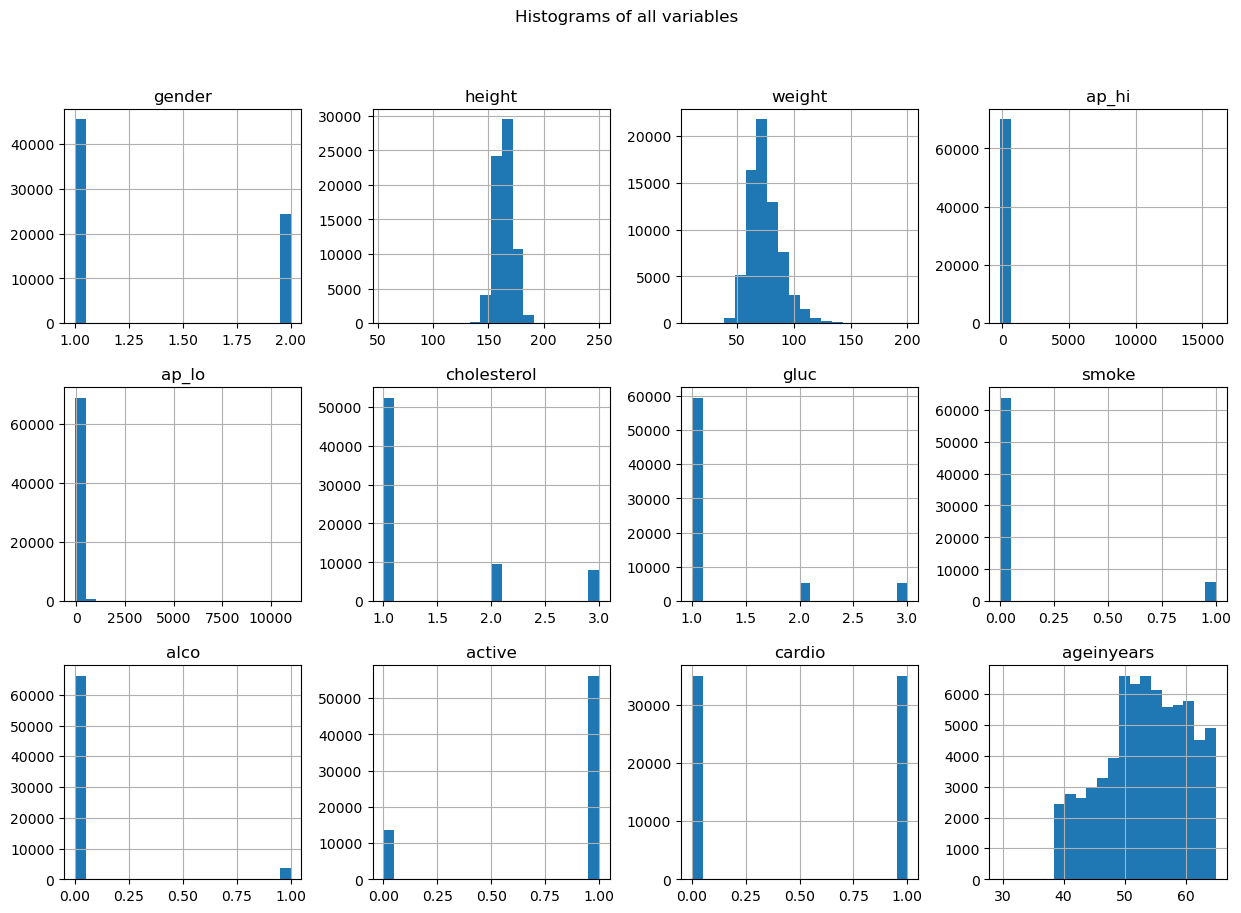

In [9]:
# Univariate Analysis - Histograms for all features
data.hist(bins=20, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of all variables')
plt.show()

The histograms of the standardized variables from the dataset offer a comprehensive view of the distribution of health-related characteristics within the population studied. Gender is represented as a binary variable, suggesting a larger sample size for one gender over the other. Height and weight are normally distributed with a right skew in weight, indicating the presence of heavier individuals. Both systolic and diastolic blood pressure readings show outliers, which might be errors or actual extreme values. Cholesterol and glucose levels are categorical, with most individuals having normal levels, and fewer having borderline or high levels. For lifestyle factors like smoking and alcohol consumption, the majority do not engage in these habits, while physical activity levels are high amongst most participants. The presence of cardiovascular disease is evenly distributed, suggesting a balanced dataset. Age shows a right-skewed distribution, indicating a population that leans younger. These patterns provide valuable insights into the health profile of the dataset, highlighting key areas such as the prevalence of risk factors for cardiovascular disease and demographic distribution, which could inform subsequent analyses and healthcare strategies.

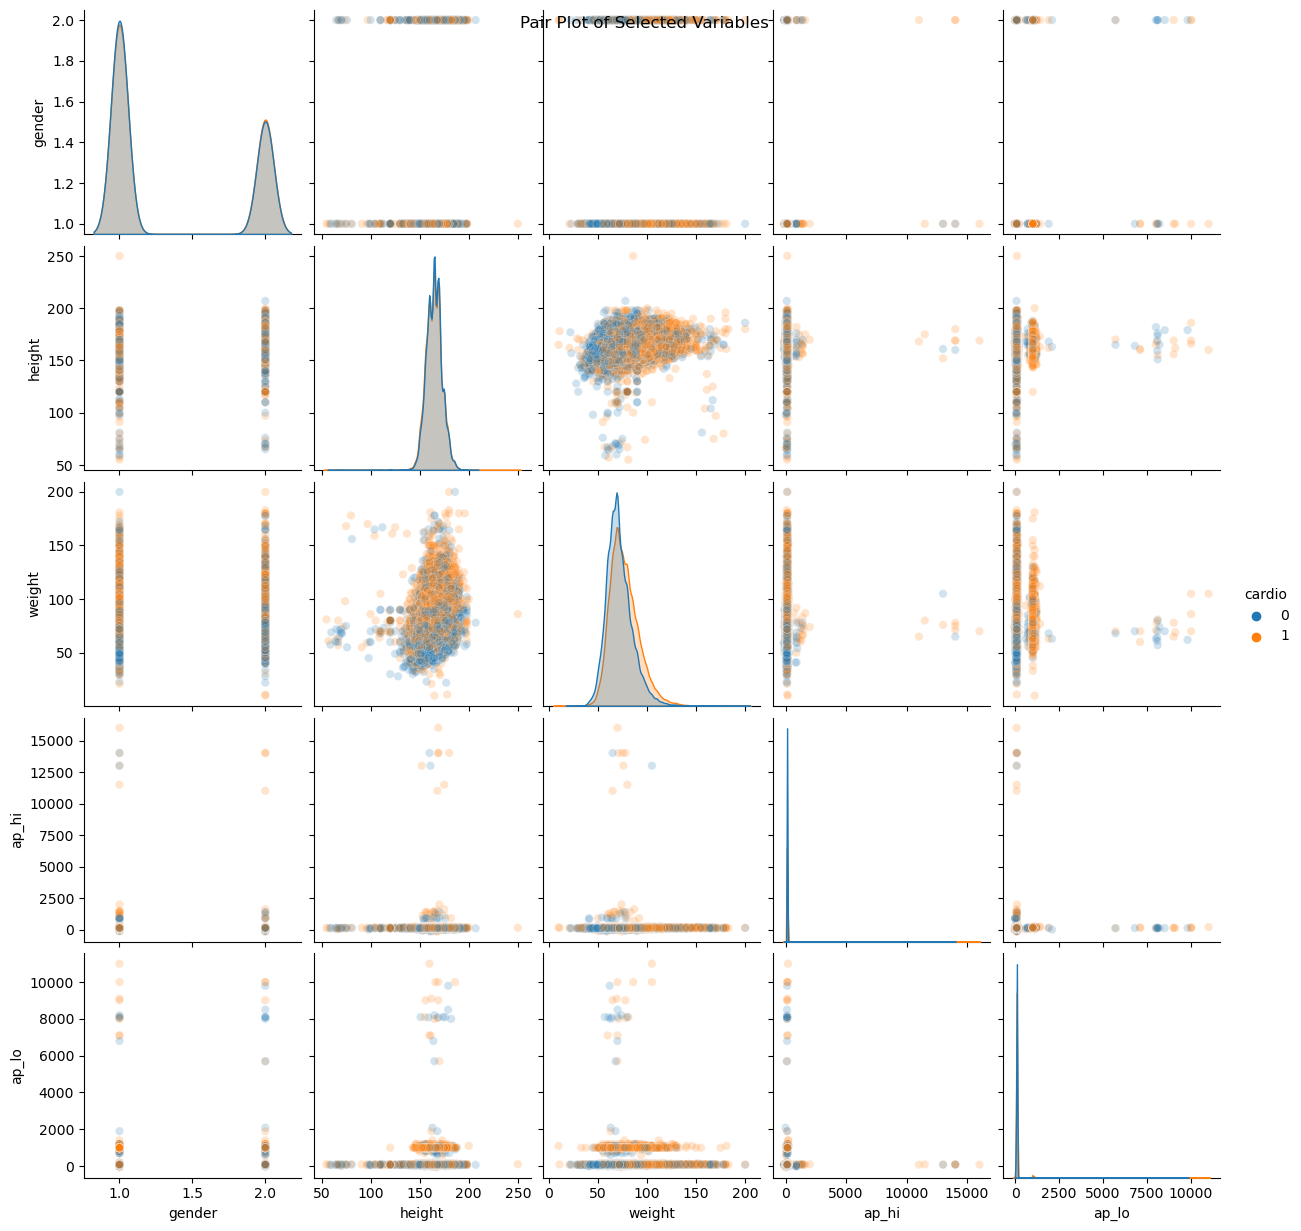

In [10]:
# Bivariate Analysis - Pair plot for selected variables
selected_variables = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']
sns.pairplot(data[selected_variables], hue='cardio', plot_kws={'alpha': 0.2})
plt.suptitle('Pair Plot of Selected Variables')
plt.show()

The pair plot highlights the relationships between health-related variables, with clear patterns emerging between 'height' and 'weight', and potential links between blood pressure readings ('ap_hi' and 'ap_lo') and cardiovascular outcomes ('cardio'). Outliers in blood pressure suggest data entry errors or unique health conditions. The binary nature of 'cardio' creates distinct distributions across variables, indicating its potential impact on health metrics. This visualization aids in identifying variables relevant for further analysis in cardiovascular health studies.

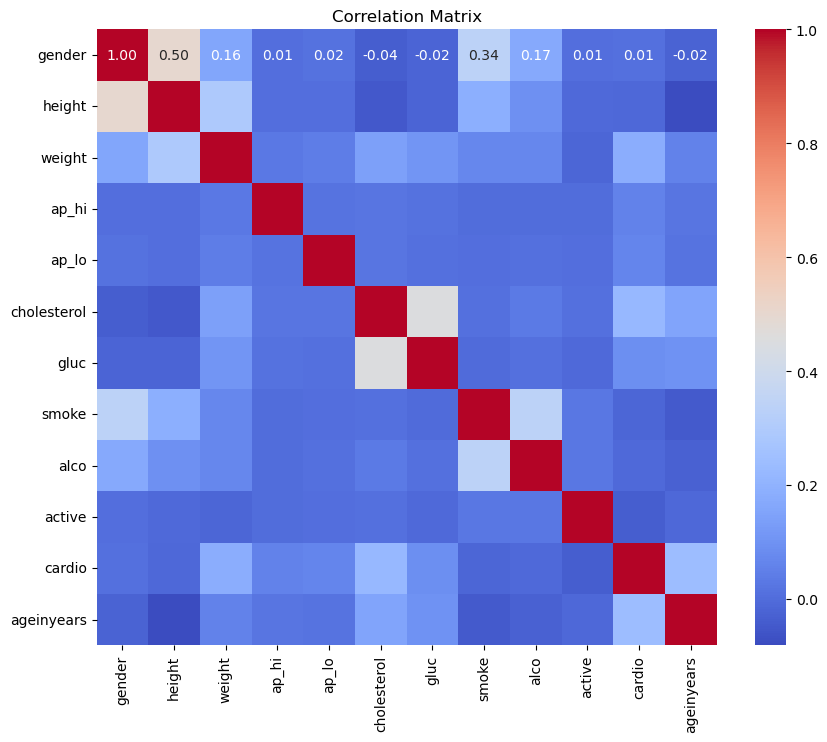

In [11]:
# Check correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix indicates moderate correlations between some of the variables, with the strongest positive relationship appearing between cholesterol and glucose levels, suggesting that individuals with high cholesterol also tend to have high glucose levels. Smoking has a notable positive correlation with gender, possibly indicating a gender difference in smoking habits within the dataset. Interestingly, there’s a small positive correlation between age and blood pressure (ap_hi and ap_lo), as well as with cholesterol, which aligns with common medical knowledge that these factors can increase with age. Cardiovascular disease (cardio) shows a slight positive correlation with age, weight, and cholesterol, implying that these factors might be associated with the presence of the disease. Overall, while some variables show relationships as expected, others do not present strong correlations, highlighting the multifaceted nature of cardiovascular health.

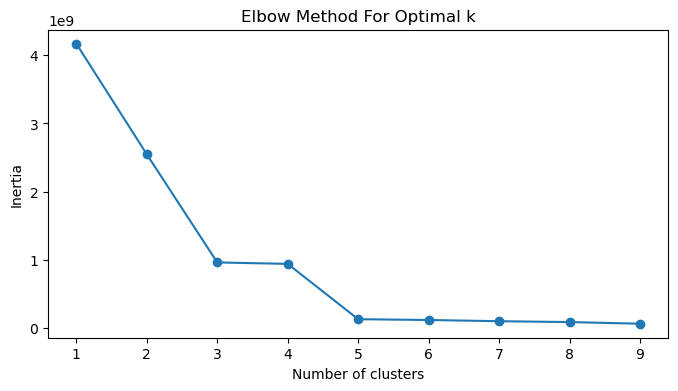

In [12]:
# Cluster Analysis with K-means
# Determining the number of clusters (k) using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
# Assuming optimal clusters from the elbow method is 3
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data)
data['Cluster'] = clusters

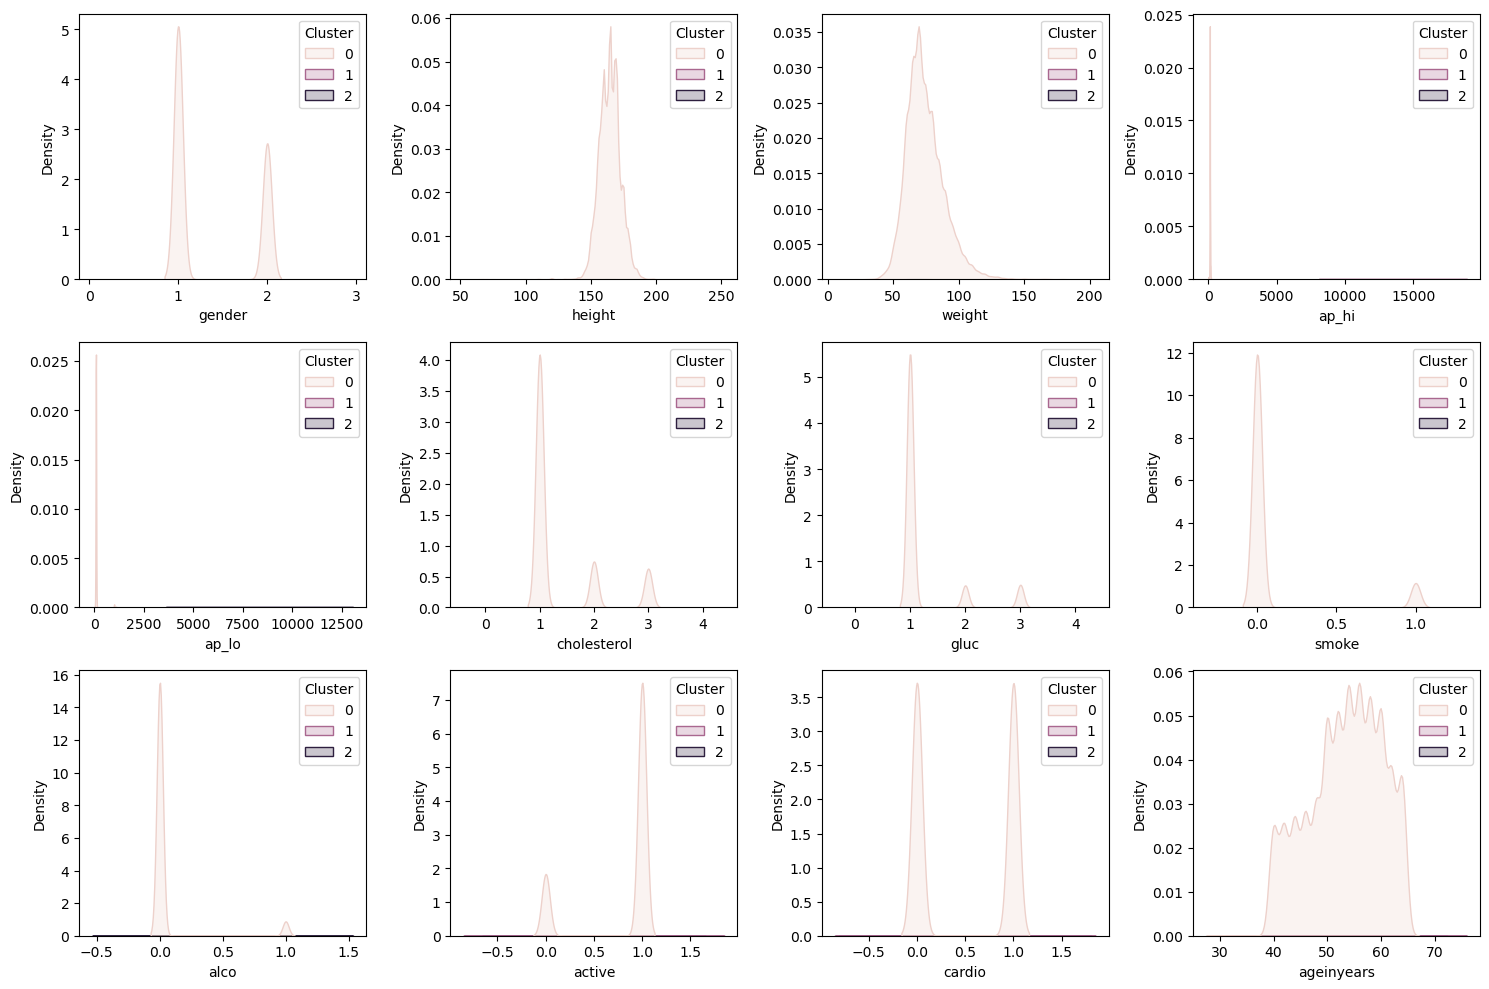

In [14]:
# Create subplots grid with 3 rows and 4 columns, with specified figure size
fig, ax = plt.subplots(3, 4, figsize=(15, 10))

# Iterate over each column in the DataFrame, excluding the last one (assumed to be the cluster label)
for i, col in enumerate(data.columns[:-1]):
    # Plot KDE plot for the current column with 'Cluster' as hue
    sns.kdeplot(data=data, x=col, hue='Cluster', ax=ax[i//4, i%4], fill=True)

# Adjust subplot layout to fit the plots nicely
plt.tight_layout()

# Show the plot
plt.show()

The density plots for each variable segmented by cluster reveal distinct group characteristics within the dataset. Most variables show significant overlap among the clusters, suggesting that these clusters are not strongly differentiated by these variables alone. However, for variables such as 'ap_hi', 'ap_lo', and 'gluc', there are noticeable differences between at least one cluster compared to the others, indicating potential unique group health profiles. 'ageinyears' displays a more spread out distribution across clusters, which could signify variations in age groupings within the clusters.

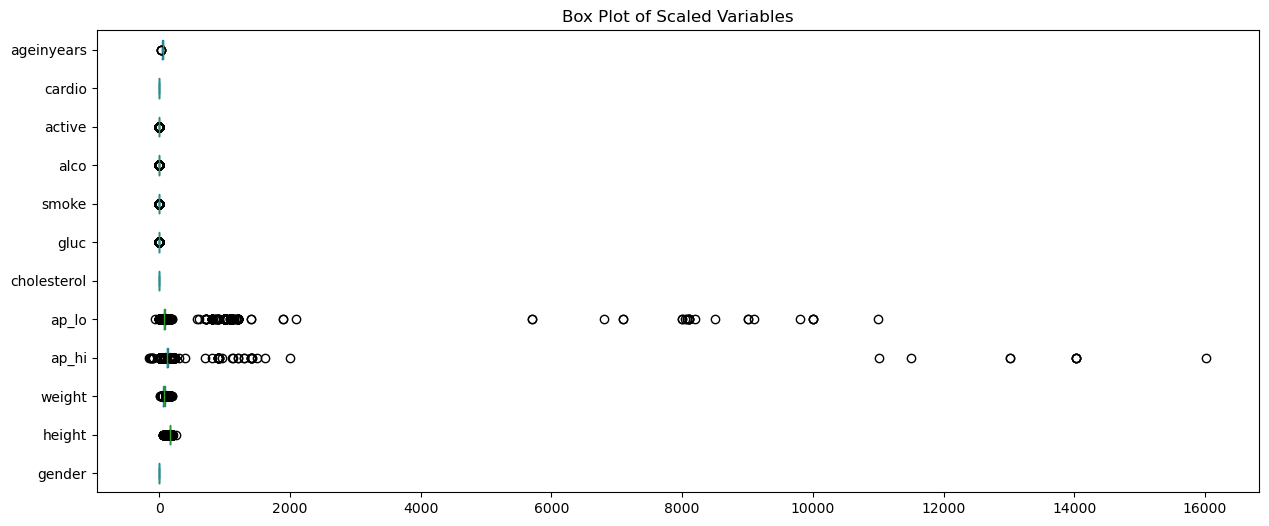

In [15]:
# Box plots for all variables
data.drop('Cluster', axis=1).plot(kind='box', figsize=(15, 6), vert=False)
plt.title('Box Plot of Scaled Variables')
plt.show()

The box plot of scaled variables shows the range and distribution of each variable. Many variables, like 'gender', 'height', and 'weight', display a tight interquartile range with few outliers, indicating homogeneity within these features. However, 'ap_hi' and 'ap_lo' (systolic and diastolic blood pressure) have a wide spread of outliers, suggesting significant variation or potential data entry errors. 'ageinyears' also has outliers, reflecting the presence of individuals who are significantly younger or older than the average.

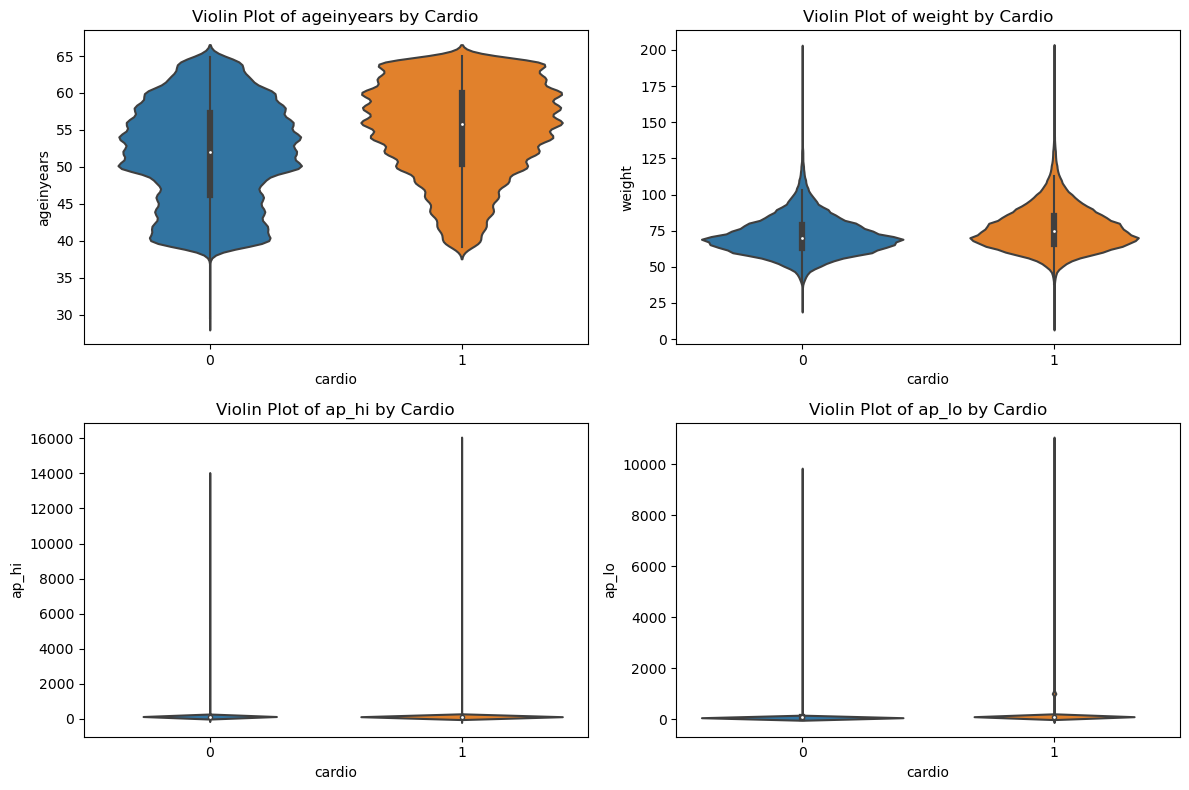

In [16]:
# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Iterate over selected columns
for i, col in enumerate(['ageinyears', 'weight', 'ap_hi', 'ap_lo']):
    # Create subplot in a 2x2 grid, indexed from 1
    plt.subplot(2, 2, i+1)
    
    # Create a violin plot for the current column with 'cardio' as x-axis and the selected column as y-axis
    sns.violinplot(x='cardio', y=col, data=data)
    
    # Set title for the subplot
    plt.title(f'Violin Plot of {col} by Cardio')

# Adjust subplot layout to fit the plots nicely
plt.tight_layout()

# Show the plot
plt.show()

The violin plots present the distribution of 'ageinyears', 'weight', 'ap_hi', and 'ap_lo' segmented by the 'cardio' category. For 'ageinyears' and 'weight', both categories of 'cardio' show similar shapes, but with 'ageinyears' slightly more distributed in the positive 'cardio' category, indicating older ages may correlate with cardiovascular events. The 'weight' distribution is similar across both 'cardio' categories, suggesting less of a distinct relationship. In contrast, 'ap_hi' and 'ap_lo' show significant outliers in both categories, which are particularly pronounced in the positive 'cardio' category, indicating higher blood pressure readings could be associated with the presence of cardiovascular disease.

In [17]:
# Check the data type of the target variable
import numpy as np
print(f"Data type of 'cardio': {data['cardio'].dtype}")

# If the target is binary but not in integer type, convert it
if data['cardio'].nunique() == 2 and not issubclass(data['cardio'].dtype.type, np.integer):
    data['cardio'] = data['cardio'].astype(int)

# Confirm changes
print(f"Data type of 'cardio' after conversion: {data['cardio'].dtype}")

Data type of 'cardio': int64
Data type of 'cardio' after conversion: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Split the data into features and target variable
X = data.drop(['cardio', 'Cluster'], axis=1)
y = data['cardio']

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [20]:
models = {
    # 'LogisticRegression': LogisticRegression(),
    # 'DecisionTreeClassifier': DecisionTreeClassifier(),
    # 'RandomForestClassifier': RandomForestClassifier(),
    # 'SVC': SVC(probability=True),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, probabilities)}\n")


LogisticRegression Metrics:
Accuracy: 0.7074761904761905
Confusion Matrix:
[[7748 2713]
 [3430 7109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72     10461
           1       0.72      0.67      0.70     10539

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000

ROC-AUC: 0.7680152712129481

DecisionTreeClassifier Metrics:
Accuracy: 0.6365714285714286
Confusion Matrix:
[[6569 3892]
 [3740 6799]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63     10461
           1       0.64      0.65      0.64     10539

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000

ROC-AUC: 0.6365225682614634

RandomForestClassifier Metrics:
Ac

In [21]:
import pickle

# Export the Gradient Boosting model
gb_model = models['GradientBoostingClassifier']
with open('gb_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)